# Real estate market analysis Part 2

The objective in this case is to continue cleaning the data and move forward in removing missing values and removing outliers. On the other hand, we are going to add new attributes based on the data.

## Dataset: Properties for sale in the City of Buenos Aires.

In this project, we will be working with a sample of the property for sale dataset mentioned above. In this dataset, each row is a property for sale. Next we will describe the attributes that we consider in this sample:

* id: property id
* created_on: date the property entered the site
* operation: rent (rent) or sale (sell)
* property_type: type of property (house, apartment, ph, etc.)
* place_with_parent_names: name of the place where the property is located according to the publisher
* lat-lon: concatenated coordinates
*lat: latitude
* lon: length
* price: price in the currency specified in currency
* currency: currency in which the publication is expressed
* price_approx_usd: approximate price in US dollars
* surface_total_in_m2: total surface (in square meters)
* surface_covered_in_m2: surface covered (in square meters)
* price_usd_per_m2: price per square meter in dollars (dollar price / area)
* floor: floor number (if applicable)
* rooms: number of environments
* expenses: expenses (if applicable)
* neighborhood: neighborhood according to official cartography
* properati_url: url of the publication in Properati


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")

plt.rcParams['figure.figsize'] = (12,5)

In [2]:
path_dataset = 'dataset/datos_properati_limpios.csv'
df = pd.read_csv(path_dataset, parse_dates=['created_on'])

In [3]:
df.columns

Index(['created_on', 'property_type', 'place_name', 'place_with_parent_names',
       'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio'],
      dtype='object')

In [4]:
print("The dataset we are going to work with here has {} observations".format(df.shape[0]))

The dataset we are going to work with here has 13756 observations


Since we already worked on it in the previous project, in this case we have already filtered observations to work only with houses (house), departments (apartment) and PH (PH).

### Outliers

Let us first analyze the extreme values that may exist in prices and surfaces. This will be useful for us to later impute using measures of central tendency, such as the average.
Let us remember that the measures of central tendency can be sensitive to outliers, so the imputation of missing values can be affected.

We will start by removing outliers.

We are going to work with `price_usd_per_m2`. High prices can correspond to large areas, so it is convenient to analyze both attributes together. Let's look at the distribution of values and a boxplot to start identifying outliers.

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Density'>

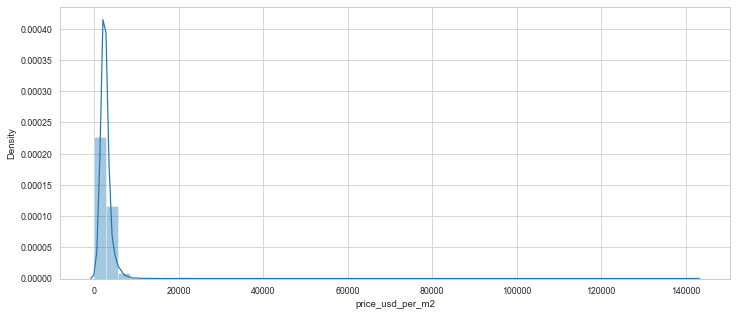

In [5]:
df["price_usd_per_m2"].dropna(inplace=True)
sns.distplot(df["price_usd_per_m2"])

<AxesSubplot:xlabel='price_usd_per_m2'>

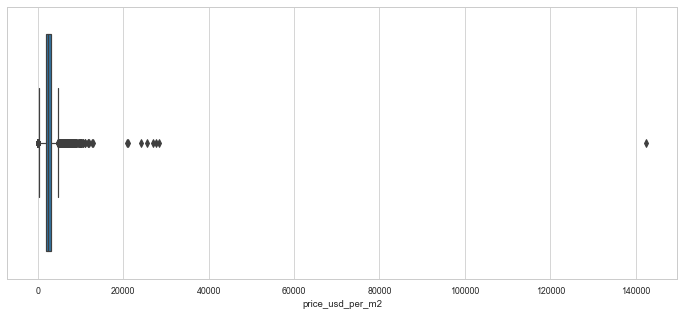

In [6]:
sns.boxplot(x=df["price_usd_per_m2"],data=df)

To confirm the presence of outliers we will use percentiles.

In [7]:
df["price_usd_per_m2"].describe()

count     12973.000000
mean       2695.065767
std        1773.086831
min           0.958333
25%        1959.183673
50%        2510.204082
75%        3125.000000
max      142450.141026
Name: price_usd_per_m2, dtype: float64

We are facing the presence of extreme values at both ends of the distribution. We are going to apply the interquartile range technique to clean them up.

To get the range we have to calculate the difference between the third and first percentile. Then based on this we will calculate the minimum and maximum values to define which observations will be discarded.

In [8]:
import numpy as np
df_filtered=df.copy()
q25, q75 = df_filtered["price_usd_per_m2"].quantile(0.25), df_filtered["price_usd_per_m2"].quantile(0.75)
irq = q75 - q25
minimo = q25 - irq * 1.5
maximo = q75 + irq * 1.5
print(minimo,maximo,q25,q75,irq)

210.45918367346985 4873.724489795918 1959.183673469388 3125.0 1165.816326530612


In [9]:
df_filtered=df_filtered[df_filtered.price_usd_per_m2>minimo]
df_filtered=df_filtered[df_filtered.price_usd_per_m2<maximo]
df_filtered

,created_on,property_type,place_name,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio
1,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO
2,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO
3,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO
4,2017-08-30,house,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO
5,2017-08-30,house,Palermo,|Argentina|Capital Federal|Palermo|,-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1vf_venta_casa_...,PALERMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13751,2017-12-17,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,-34.668970,-58.443897,49000.00,75.0,75.0,653.333333,NaN,4.0,NaN,https://www.properati.com.ar/1j22x_venta_depar...,VILLA SOLDATI
13752,2018-01-08,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_depar...,VILLA SOLDATI
13753,2018-01-23,house,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_...,VILLA SOLDATI
13754,2018-01-27,apartment,Villa Soldati,|Argentina|Capital Federal|Villa Soldati|,-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_depar...,VILLA SOLDATI


<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Density'>

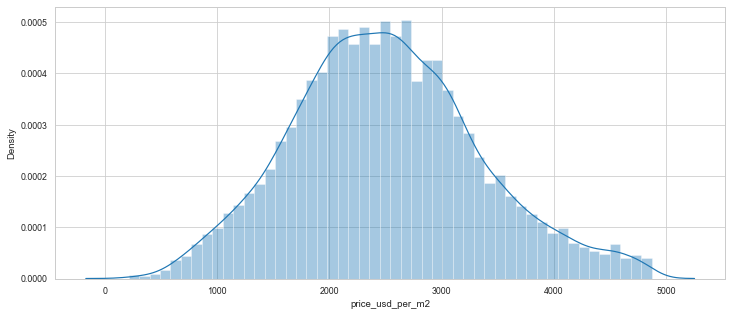

In [10]:
sns.distplot(df_filtered["price_usd_per_m2"])

<AxesSubplot:xlabel='price_usd_per_m2'>

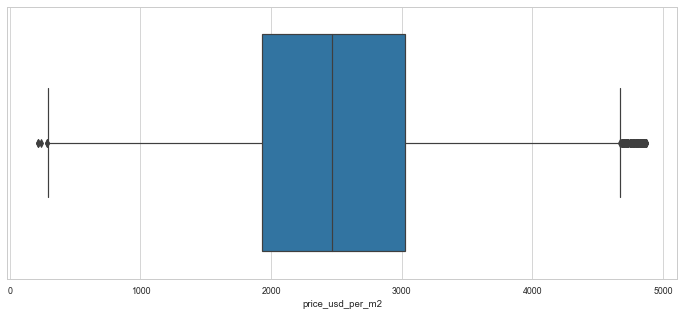

In [11]:
sns.boxplot(x=df_filtered["price_usd_per_m2"],data=df_filtered)

In [12]:
df_filtered["price_usd_per_m2"].describe()

count    12288.000000
mean      2505.089766
std        834.949633
min        213.068182
25%       1933.333333
50%       2466.666667
75%       3027.864583
max       4871.794872
Name: price_usd_per_m2, dtype: float64

Let's continue working with the filtered `dataframe`

In [13]:
df = df_filtered

### Missing values

Unlike the last project, we are going to try to impute the missing values for the attributes that we consider important for the real estate market.

These attributes are those that inform **area (total or covered), number of rooms, price and price per square meter**.

Let's first see how many missing values each attribute has. We are interested in seeing it as a percentage in relation to the number of observations. If an attribute has a high percentage of missing items, it may be better not to consider it in the analysis.

In [14]:
df.columns

Index(['created_on', 'property_type', 'place_name', 'place_with_parent_names',
       'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio'],
      dtype='object')

In [15]:
na_ratio = ((df.isnull().sum() / len(df))*100)
print(na_ratio)

created_on                  0.000000
property_type               0.000000
place_name                  0.000000
place_with_parent_names     0.000000
lat                         0.000000
                             ...    
floor                      85.083008
rooms                      17.578125
expenses                   73.974609
properati_url               0.000000
barrio                      0.000000
Length: 15, dtype: float64


We can see from the results that the `floor` and `expenses` attributes have a high percentage of missing items. One option would be to drop these columns in the analysis.

Another option would be, for example, to consider categories as missing or not missing or in any case to analyze if there is any pattern to avoid removing them.

To move forward with the project, we're going to remove those attributes.

In [16]:
df = df.drop(['floor', 'expenses'], axis = 1)

Let's discuss strategies for imputing missing values for the `rooms`, `surface_total_in_m2` and `surface_covered_in_m2` attributes.

In [17]:
print(df.surface_total_in_m2.isna().sum())
print(df.surface_covered_in_m2.isna().sum())

0
474


As it can be seen, the "surface_total_in_m2" column doesn't have null values, so I'll move on with "surface_covered_in_m2"

In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean') #Impute with the mean value
supcov=df.surface_covered_in_m2.values
imp.fit(supcov.reshape(-1,1))
print(imp.statistics_)

[93.82046724]


In [19]:
supcov_imputed=imp.transform(supcov.reshape(-1,1))
print(supcov_imputed[:5])

[[120.]
 [ 48.]
 [ 70.]
 [334.]
 [334.]]


In [20]:
df.surface_covered_in_m2=supcov_imputed
df.surface_covered_in_m2.isna().sum()

0

One of the limitations of this type of imputation is that it leads to biased estimates of variance. This has an impact on the standard errors and, therefore, on the statistical tests.

This type of technique is useful when the values are completely random.

In [21]:
imp = SimpleImputer(strategy='median') #Impute with the median value.
supcov2=df.rooms.values
imp.fit(supcov2.reshape(-1,1))
print(imp.statistics_)

[3.]


In [22]:
supcov2_imputed=imp.transform(supcov2.reshape(-1,1))
print(supcov2_imputed[:5])

[[4.]
 [1.]
 [3.]
 [6.]
 [6.]]


In [23]:
df.rooms=supcov2_imputed
df.rooms.isna().sum()

0

### Binary variables

#### Generate binary variables for the `property_type` attribute.

Keep in mind in this case that the attribute is categorical.

To do this using scikit-learn, because of how the values are given (in string format), it is best to convert them to numbers first. For this we use `LabelEncoder`.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
p_type=df.property_type.values
p_type

array(['apartment', 'apartment', 'apartment', ..., 'house', 'apartment',
       'apartment'], dtype=object)

In [25]:
le.fit(p_type)
p_type_encoded=le.transform(p_type)
p_type_encoded

array([1, 1, 1, ..., 2, 1, 1])

In [26]:
list(le.classes_)

['PH', 'apartment', 'house']

Then with `OneHotEncoder` we get the categories expressed as **binary variables**.

In [27]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False, categories="auto")
p_type_encoded=p_type_encoded.reshape(-1,1)
onehot_encoder.fit(p_type_encoded)

OneHotEncoder(sparse=False)

In [28]:
onehot_encoder.categories_

[array([0, 1, 2])]

In [29]:
p_type_encoded_onehot=onehot_encoder.transform(p_type_encoded)
print(p_type_encoded_onehot)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [30]:
categoricals_df = pd.DataFrame(p_type_encoded_onehot, index=df.index, columns = le.classes_)
categoricals_df

,PH,apartment,house
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
...,...,...,...
13751,0.0,1.0,0.0
13752,0.0,1.0,0.0
13753,0.0,0.0,1.0
13754,0.0,1.0,0.0


We join the new dataframe `categorical_df` with the original `dataframe` `df`. For this, we need them to have the same index.

In [31]:
categoricals_df = categoricals_df.set_index(df.index)
df = pd.concat([df, categoricals_df], axis=1)
df.head()

,created_on,property_type,place_name,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,barrio,PH,apartment,house
1,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,4.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,0.0,1.0,0.0
2,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,1.0,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO,0.0,1.0,0.0
3,2017-08-29,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,3.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO,0.0,1.0,0.0
4,2017-08-30,house,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO,0.0,0.0,1.0
5,2017-08-30,house,Palermo,|Argentina|Capital Federal|Palermo|,-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,6.0,https://www.properati.com.ar/1e1vf_venta_casa_...,PALERMO,0.0,0.0,1.0


### Calculated variables

Be careful in this part about dividing by zero. To do this, we put together a division function that contemplates that.

In [32]:
def custom_division(x, y):
    if y > 0:
        res = x / y
    else:
        res = 0
    return res

df['price_m2'] = df.apply(lambda x: custom_division(x['price_aprox_usd'], x['surface_total_in_m2']), axis = 1)
df.drop(['price_usd_per_m2'], axis=1, inplace=True)

__Verify that there are no more attributes with missing values__

In [34]:
# We create a dataset with the percentages of nulls
df_missing = pd.DataFrame(df.isnull().sum() / df.shape[0], columns=['Null percentage'])
# Show only the ones with null values. If the percentage is 0 it is not shown
df_missing.loc[~(df_missing==0).all(axis=1)]

,Null percentage


In [35]:
print("The final dataset after processing has {} observations".format(df.shape[0]))

The final dataset after processing has 12288 observations


In this way, we have cleaned extreme values and imputed null values.